In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
dataset : https://www.kaggle.com/datasets/heeraldedhia/bike-buyers

In [ ]:
data = pd.read_csv('bike_buyers.csv')

In [ ]:
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [ ]:
data.shape

(1000, 13)

4

describe works on the datatypes. You can include or exclude based on the datatype & not based on columns. If

In [ ]:
cols = set(data.columns) - {'ID'}
print(cols)
df1 = data[list(cols)]
df1.describe()

{'Region', 'Cars', 'Home Owner', 'Children', 'Education', 'Marital Status', 'Commute Distance', 'Gender', 'Income', 'Occupation', 'Age', 'Purchased Bike'}


,Cars,Children,Income,Age
count,991.000000,992.000000,994.000000,992.000000
mean,1.455096,1.910282,56267.605634,44.181452
std,1.121755,1.626910,31067.817462,11.362007
min,0.000000,0.000000,10000.000000,25.000000
25%,1.000000,0.000000,30000.000000,35.000000
50%,1.000000,2.000000,60000.000000,43.000000
75%,2.000000,3.000000,70000.000000,52.000000
max,4.000000,5.000000,170000.000000,89.000000


In [ ]:
data.describe(include='all')

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
count,1000.000000,993,989,994.000000,992.000000,1000,1000,996,991.000000,1000,1000,992.000000,1000
unique,NaN,2,2,NaN,NaN,5,5,2,NaN,5,3,NaN,2
top,NaN,Married,Male,NaN,NaN,Bachelors,Professional,Yes,NaN,0-1 Miles,North America,NaN,No
freq,NaN,535,500,NaN,NaN,306,276,682,NaN,366,508,NaN,519
mean,19965.992000,NaN,NaN,56267.605634,1.910282,NaN,NaN,NaN,1.455096,NaN,NaN,44.181452,NaN
std,5347.333948,NaN,NaN,31067.817462,1.626910,NaN,NaN,NaN,1.121755,NaN,NaN,11.362007,NaN
min,11000.000000,NaN,NaN,10000.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,25.000000,NaN
25%,15290.750000,NaN,NaN,30000.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,35.000000,NaN
50%,19744.000000,NaN,NaN,60000.000000,2.000000,NaN,NaN,NaN,1.000000,NaN,NaN,43.000000,NaN
75%,24470.750000,NaN,NaN,70000.000000,3.000000,NaN,NaN,NaN,2.000000,NaN,NaN,52.000000,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


## Data Preprocessing

In [ ]:
data.isnull().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [ ]:
data['Marital Status'].mode()

0    Married
Name: Marital Status, dtype: object

In [ ]:
#null replaced buy most often variable
data['Marital Status'].fillna('Married',inplace=True)

In [ ]:
data.isnull().sum()

ID                   0
Marital Status       0
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

Mean imputation can be used when the distribution of the data is normal, and the missing values are random. Median imputation is appropriate when the distribution of the data is skewed. Mode imputation is used when dealing with categorical data, where the mode represents the most common category or unqiue values

In [ ]:
data['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [ ]:
data['Gender'].fillna('Male', inplace=True)

In [ ]:
data['Income'].mean()

56267.605633802814

In [ ]:
data['Income'].fillna(data['Income'].mean(), inplace=True)

In [ ]:
data['Children'].median()

2.0

In [ ]:
data['Children'].fillna(data['Children'].median(),inplace=True)

In [ ]:
data['Home Owner'].mode()

0    Yes
Name: Home Owner, dtype: object

In [ ]:
data['Home Owner'].fillna('Yes', inplace=True)

In [ ]:
data['Cars'].mode()#return mode of columns i.e 0 as column

0    2.0
Name: Cars, dtype: float64

In [ ]:
data['Cars'].fillna(2, inplace=True)

In [ ]:
data['Age'].median()

43.0

In [ ]:
data['Age'].fillna(data['Age'].median(), inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb4790207c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb479022950>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb479022c50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb479022020>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb479021000>],
 'means': []}

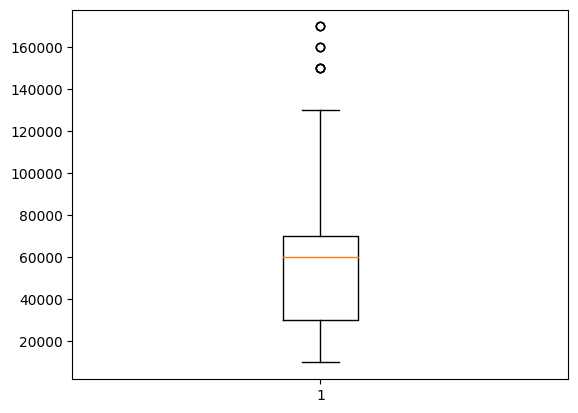

In [ ]:
plt.boxplot(data['Income'])

In [ ]:
data.isnull().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

A box and whisker plot or diagram (otherwise known as a boxplot), is a graph summarising a set of data. The shape of the boxplot shows how the data is distributed and it also shows any outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb47a38ee60>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb47905b7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb479059d80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb47905ad70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb47905abf0>],
 'means': []}

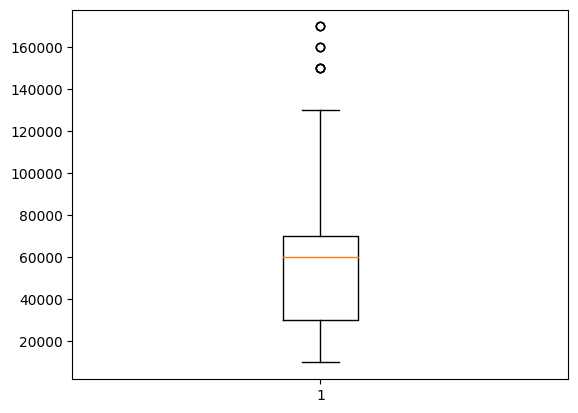

In [ ]:
plt.boxplot(data['Income'])

Group By

Let us group the quantitative variables 'Age' and 'Income' by 'Marital Status'

In [ ]:
grp1=data[['Age','Income']].groupby(data['Marital Status'])

In [ ]:
grp1.head()

,Age,Income
0,42.0,40000.0
1,43.0,30000.0
2,60.0,80000.0
3,41.0,70000.0
4,36.0,30000.0
5,50.0,10000.0
6,33.0,160000.0
7,43.0,40000.0
11,36.0,90000.0
14,45.0,60000.0


In [ ]:
grp1.mean()

,Age,Income
Marital Status,,
Married,46.321033,58625.591185
Single,41.628821,53477.151116


In [ ]:
grp1.median()

,Age,Income
Marital Status,,
Married,45.0,60000.0
Single,40.0,50000.0


In [ ]:
grp1.min()

,Age,Income
Marital Status,,
Married,25.0,10000.0
Single,25.0,10000.0


In [ ]:
grp1.max()

,Age,Income
Marital Status,,
Married,89.0,170000.0
Single,78.0,170000.0


In [ ]:
grp1.std()

,Age,Income
Marital Status,,
Married,11.274277,31036.675142
Single,10.841296,30700.825019


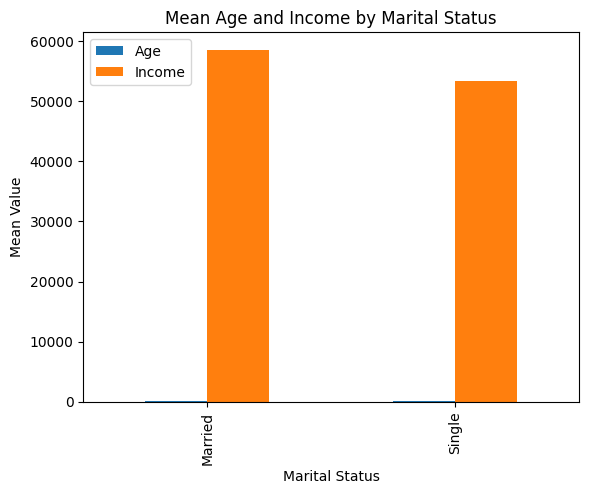

In [ ]:
grp1.mean().plot(kind='bar')
plt.title('Mean Age and Income by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Mean Value')
plt.show()

In [ ]:
df=pd.read_csv('Iris.csv',index_col='Id')
# df.drop('Id',axis=1)

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.mean()

<ipython-input-7-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Id               75.500000
SepalLengthCm     5.843333
SepalWidthCm      3.054000
PetalLengthCm     3.758667
PetalWidthCm      1.198667
dtype: float64

In [ ]:
iris_spec=df.groupby(by="Species")
iris_spec

In [ ]:
iris_spec.std()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,14.57738,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,14.57738,0.516171,0.313798,0.469911,0.197753
Iris-virginica,14.57738,0.635880,0.322497,0.551895,0.274650


In [ ]:
iris_spec.mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


In [ ]:
iris_spec.median()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.0,3.4,1.50,0.2
Iris-versicolor,75.5,5.9,2.8,4.35,1.3
Iris-virginica,125.5,6.5,3.0,5.55,2.0


In [ ]:
iris_spec.min()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,1,4.3,2.3,1.0,0.1
Iris-versicolor,51,4.9,2.0,3.0,1.0
Iris-virginica,101,4.9,2.2,4.5,1.4


In [ ]:
iris_spec.max()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,5.8,4.4,1.9,0.6
Iris-versicolor,100,7.0,3.4,5.1,1.8
Iris-virginica,150,7.9,3.8,6.9,2.5


In [ ]:
iris_spec.quantile()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.0,3.4,1.50,0.2
Iris-versicolor,75.5,5.9,2.8,4.35,1.3
Iris-virginica,125.5,6.5,3.0,5.55,2.0


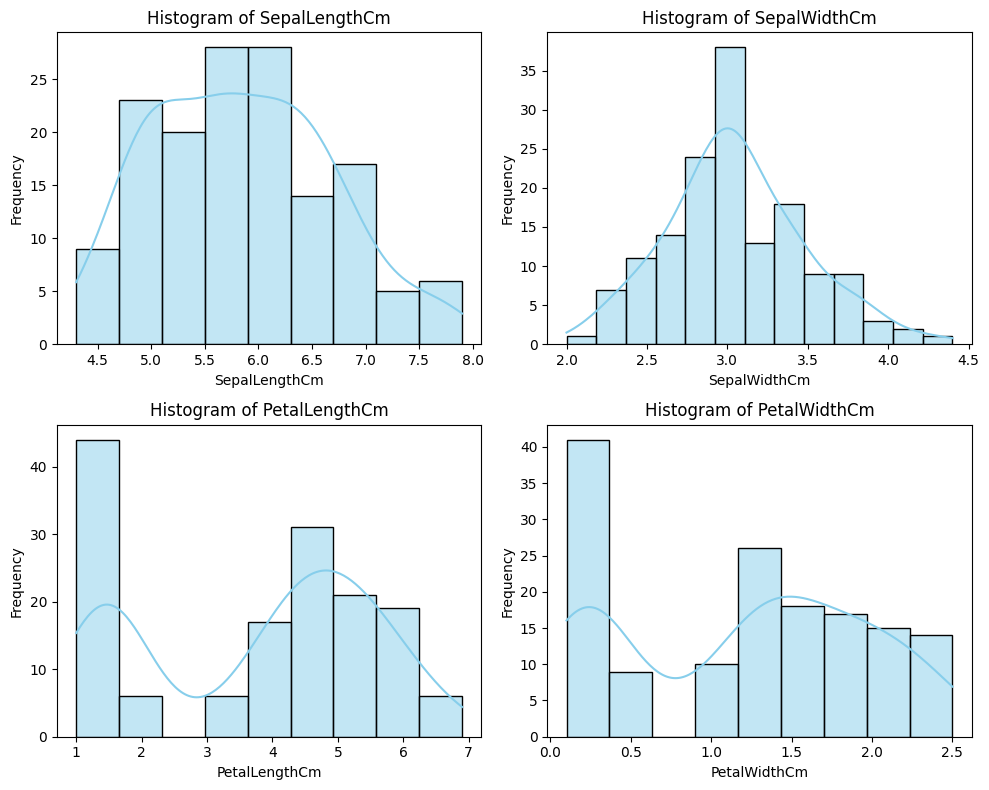

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
# import pandas as pd

# # Load the Iris dataset
# iris = load_iris()
# iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Plotting histograms for each feature
plt.figure(figsize=(10, 8))
for i, feature in enumerate(df.columns[:-1]):  # Exclude the last column which is the target variable
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

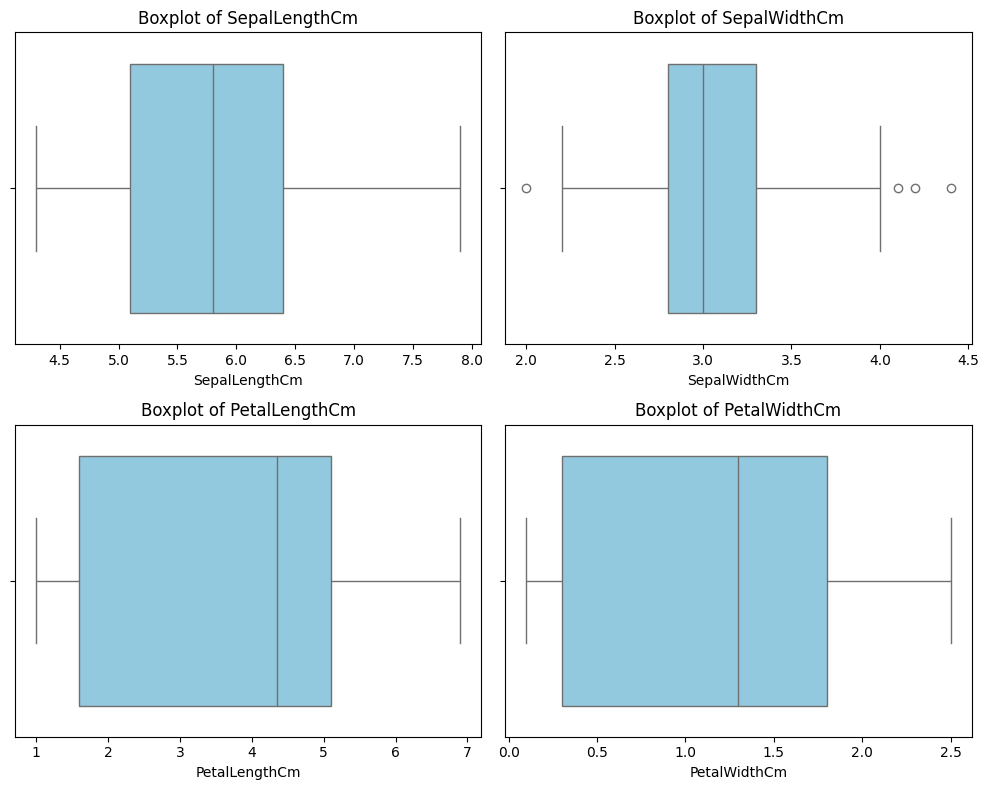

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting boxplots for each feature
plt.figure(figsize=(10, 8))
for i, feature in enumerate(df.columns[:-1]):  # Exclude the last column which is the target variable
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()